In [5]:
# Завдання 2. Завантажити датасет Титанік з Kaggle (абовикористовуйте вже завантажений файл titanic2.csv)
# Виконати попередній аналіз даних.

import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# Завантаження датасету Titanic
file_path = '/content/drive/MyDrive/Colab Notebooks/titanic.csv'  # Вкажіть правильний шлях до файлу
titanic_df = pd.read_csv(file_path)

# 1. Вивести перші 5 рядків
print(titanic_df.head())

# 2. Визначити розмір датасету
print(f"Розмір датасету: {titanic_df.shape}")

# 3. Визначити тип даних
print("\nТипи даних кожного стовпця:")
print(titanic_df.dtypes)

# 4. Визначити наявність пропущених значень
print("\nПропущені значення:")
print(titanic_df.isnull().sum())

# 5. Замінити пропущені значення на середнє значення
# Замінюємо пропущені значення в колонці 'Age' на середнє значення
average_age = titanic_df['Age'].mean()
titanic_df['Age'].fillna(average_age, inplace=True)

# Замінюємо пропущені значення в колонці 'Fare' на середнє значення
average_fare = titanic_df['Fare'].mean()
titanic_df['Fare'].fillna(average_fare, inplace=True)

# 6. Ще раз перевірити наявність пропущених значень
print("\nПропущені значення після заміни:")
print(titanic_df.isnull().sum())

# 7. Перевірити наявність дублікатів
duplicates = titanic_df.duplicated().sum()
print(f"\nКількість дублікатів: {duplicates}")

# Видаляємо дублікати, якщо є
titanic_df.drop_duplicates(inplace=True)

# 8. Вивести описову статистику датасету
print("\nОписова статистика:")
print(titanic_df.describe())

# 9. Видалити стовпчик Cabin
titanic_df.drop(columns=['Cabin'], inplace=True)

# 10. Сформувати датасет з обраними стовпцями
selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
titanic_selected = titanic_df[selected_columns]

# 11. Замінити бінарні ознаки (Стать) на 0 і 1
# Перевіряємо унікальні значення в колонці 'Sex'
print("\nУнікальні значення у стовпці 'Sex':")
print(titanic_selected['Sex'].unique())

# Замінюємо: 'male' -> 0, 'female' -> 1
titanic_selected['Sex'] = titanic_selected['Sex'].map({'male': 0, 'female': 1})

# 12. Перевірити кількість пропущених даних
print("\nПропущені значення у вибраних стовпцях:")
print(titanic_selected.isnull().sum())

# 13. Вивести 5 перших рядків
print("\nПерші 5 рядків:")
print(titanic_selected.head())

# 14. Вивести 5 останніх рядків
print("\nОстанні 5 рядків:")
print(titanic_selected.tail())

# 15. Аналіз виживання залежно від статі: відсоток виживання для кожної статі
survival_by_gender = titanic_selected.groupby('Sex')['Survived'].mean() * 100
print("\nВідсоток виживання за статтю:")
print(survival_by_gender)

# 16. Відсоток виживання для кожного класу (Pclass)
survival_by_class = titanic_selected.groupby('Pclass')['Survived'].mean() * 100
print("\nВідсоток виживання за класами:")
print(survival_by_class)

# 17. Середній вік тих, хто вижив, і тих, хто не вижив
mean_age_survived = titanic_selected[titanic_selected['Survived'] == 1]['Age'].mean()
mean_age_not_survived = titanic_selected[titanic_selected['Survived'] == 0]['Age'].mean()
print(f"\nСередній вік тих, хто вижив: {mean_age_survived}")
print(f"Середній вік тих, хто не вижив: {mean_age_not_survived}")

# 18. Аналіз тарифу та виживання
# Розподіляємо пасажирів за рівнями тарифів (Fare) і обчислюємо рівень виживання
fare_groups = pd.cut(titanic_selected['Fare'], bins=[0, 50, 100, 150, 200, 600], labels=['0-50', '50-100', '100-150', '150-200', '200+'])
survival_by_fare_group = titanic_selected.groupby(fare_groups)['Survived'].mean() * 100
print("\nВиживання за рівнями тарифів:")
print(survival_by_fare_group)

# 19. Середній тариф для кожного класу
mean_fare_by_class = titanic_selected.groupby('Pclass')['Fare'].mean()
print("\nСередній тариф за класами:")
print(mean_fare_by_class)

# 20. Середній вік пасажирів для кожного класу
mean_age_by_class = titanic_selected.groupby('Pclass')['Age'].mean()
print("\nСередній вік пасажирів за класами:")
print(mean_age_by_class)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN      

<ipython-input-5-5a7bcd633c1f>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(average_age, inplace=True)
<ipython-input-5-5a7bcd633c1f>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

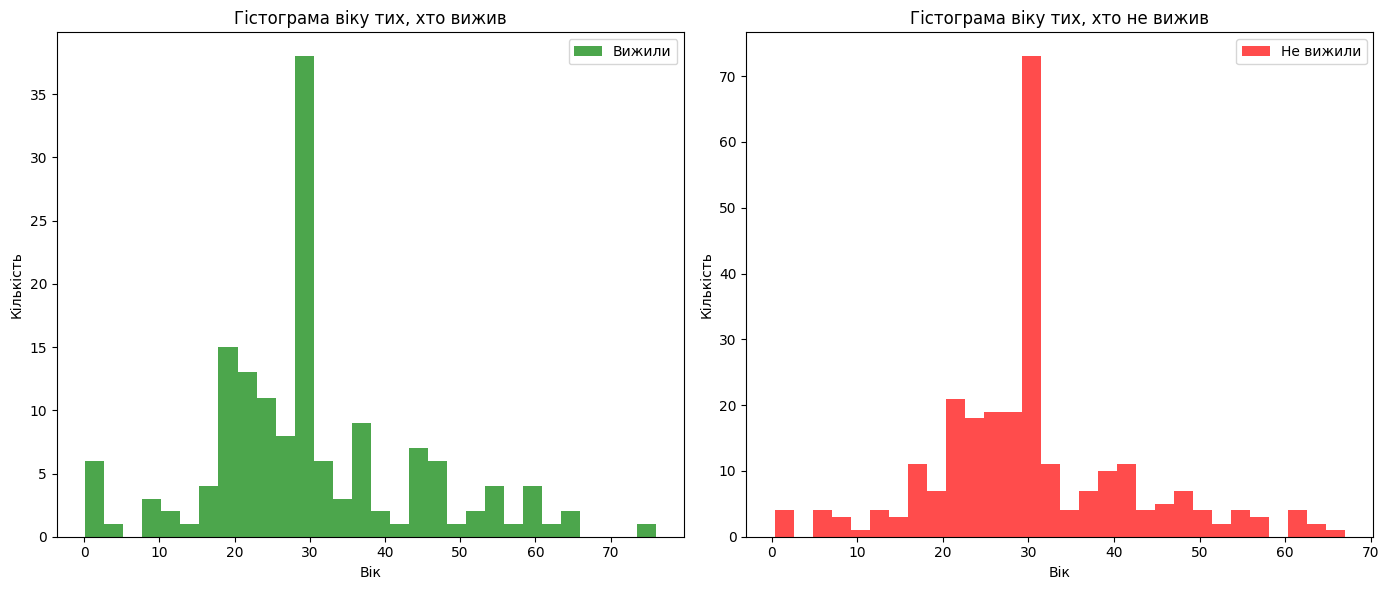

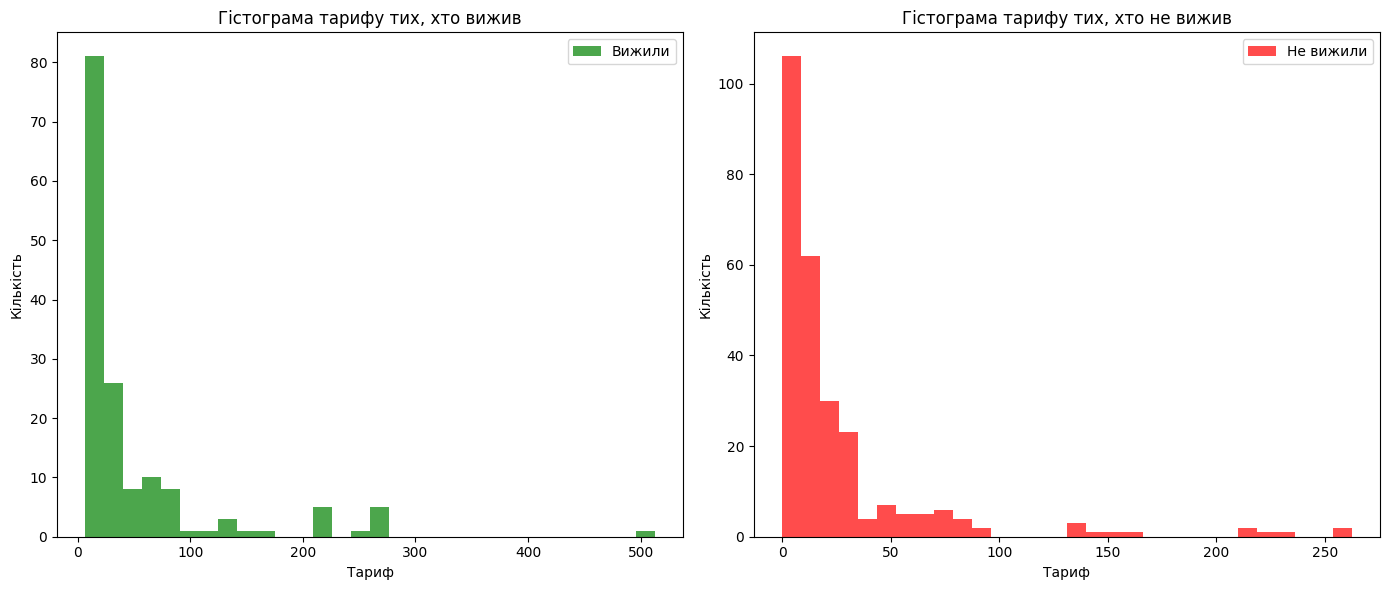

In [6]:
import matplotlib.pyplot as plt

# Гістограма для віку
plt.figure(figsize=(14, 6))

# Гістограма для тих, хто вижив
plt.subplot(1, 2, 1)
plt.hist(titanic_selected[titanic_selected['Survived'] == 1]['Age'], bins=30, color='green', alpha=0.7, label='Вижили')
plt.title('Гістограма віку тих, хто вижив')
plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.legend()

# Гістограма для тих, хто не вижив
plt.subplot(1, 2, 2)
plt.hist(titanic_selected[titanic_selected['Survived'] == 0]['Age'], bins=30, color='red', alpha=0.7, label='Не вижили')
plt.title('Гістограма віку тих, хто не вижив')
plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.legend()

plt.tight_layout()
plt.show()

# Гістограма для тарифу (Fare)
plt.figure(figsize=(14, 6))

# Гістограма для тих, хто вижив
plt.subplot(1, 2, 1)
plt.hist(titanic_selected[titanic_selected['Survived'] == 1]['Fare'], bins=30, color='green', alpha=0.7, label='Вижили')
plt.title('Гістограма тарифу тих, хто вижив')
plt.xlabel('Тариф')
plt.ylabel('Кількість')
plt.legend()

# Гістограма для тих, хто не вижив
plt.subplot(1, 2, 2)
plt.hist(titanic_selected[titanic_selected['Survived'] == 0]['Fare'], bins=30, color='red', alpha=0.7, label='Не вижили')
plt.title('Гістограма тарифу тих, хто не вижив')
plt.xlabel('Тариф')
plt.ylabel('Кількість')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
# Обчислення відсотка виживання для кожної комбінації статі та класу
survival_rate_by_gender_class = titanic_selected.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100

# Перетворюємо результати у DataFrame для зручності
survival_rate_df = survival_rate_by_gender_class.reset_index()

# Задаємо назви стовпців
survival_rate_df.columns = ['Sex', 'Pclass', 'Survival Rate (%)']

# Виводимо результати
print("\nВідсоток виживання для кожної комбінації статі та класу:")
print(survival_rate_df)



Відсоток виживання для кожної комбінації статі та класу:
   Sex  Pclass  Survival Rate (%)
0    0       1                0.0
1    0       2                0.0
2    0       3                0.0
3    1       1              100.0
4    1       2              100.0
5    1       3              100.0


In [9]:
import pandas as pd

# Завантаження датасету Titanic
file_path = '/content/drive/MyDrive/Colab Notebooks/titanic.csv'  # Вкажіть правильний шлях до файлу
titanic_df = pd.read_csv(file_path)

# Вибір колонок, які нас цікавлять
selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
titanic_selected = titanic_df[selected_columns]

# Замінити бінарні ознаки (Стать) на 0 і 1
titanic_selected['Sex'] = titanic_selected['Sex'].map({'male': 0, 'female': 1})

# Обчислити середнє значення виживання для кожної комбінації статі та класу
survival_by_sex_class = titanic_selected.groupby(['Sex', 'Pclass'])['Survived'].mean().reset_index()

# Перейменування стовпців для зручності
survival_by_sex_class.columns = ['Sex', 'Pclass', 'Survival Rate']

# Вивід результатів
print("\nВиживання за статтю та класом:")
print(survival_by_sex_class)

# Обчислення кореляції
correlation_matrix = survival_by_sex_class.corr()

# Витягування кореляції з виживанням
survival_correlation = correlation_matrix['Survival Rate']

# Вивід кореляції
print("\nКореляція з виживанням:")
print(survival_correlation)



Виживання за статтю та класом:
   Sex  Pclass  Survival Rate
0    0       1            0.0
1    0       2            0.0
2    0       3            0.0
3    1       1            1.0
4    1       2            1.0
5    1       3            1.0

Кореляція з виживанням:
Sex              1.0
Pclass           0.0
Survival Rate    1.0
Name: Survival Rate, dtype: float64


<ipython-input-9-4be62b04e32f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_selected['Sex'] = titanic_selected['Sex'].map({'male': 0, 'female': 1})
